<a href="https://colab.research.google.com/github/vlpolina/VGG16/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

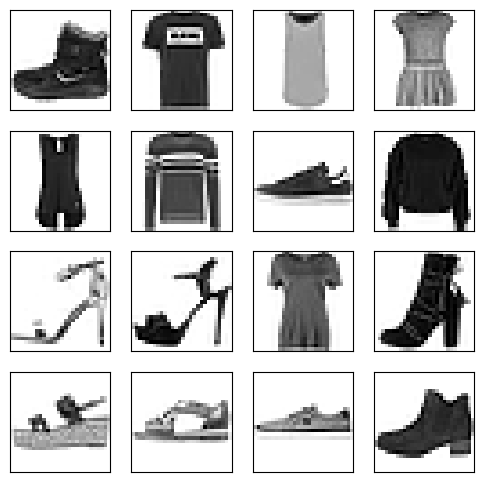

In [ ]:
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(50, input_shape=(784,), activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))

In [ ]:
from keras.optimizers import Adam
model.compile(loss='mse', metrics=['accuracy'], optimizer=Adam())

In [ ]:
model.fit(x_train, y_train_cat,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0559 - accuracy: 0.5453
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.5971
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.6083
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.6151
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443 - accuracy: 0.6198


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.6105


[0.045859452337026596, 0.6104999780654907]

1/1 [==============================] - 0s 48ms/step
Мнение нейронной сети:  1
Верный ответ:  1


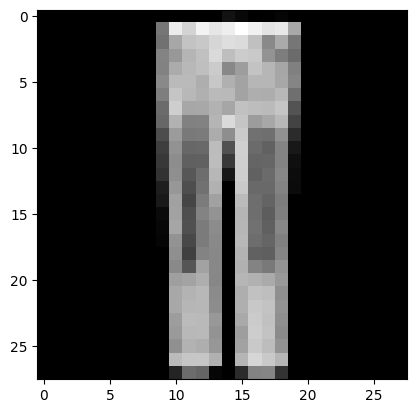

In [ ]:
I = 15 # номер изображения для вывода
plt.imshow(x_test[I].reshape([28, 28]), cmap='gray') # отрисовка изображения
print("Мнение нейронной сети: ", np.argmax(model.predict(x_test[I].reshape([1, 28, 28])))) # отрисовка изображения
print("Верный ответ: ", y_test[I])